In [11]:
from pyfluids import Fluid, FluidsList,Input
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib import font_manager
from matplotlib.ticker import MultipleLocator as mtl, FuncFormatter as fontf
from Casos import  (data_1A,data_1BC,data_2A,data_2BC,data_3ABC,data_EPI,data_NRTC,data_4A,data_4BC,data_EPI) 
from cycler import cycler 
cores=plt.get_cmap("Set2").colors
plt.rc('axes', prop_cycle=cycler('color', cores))
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

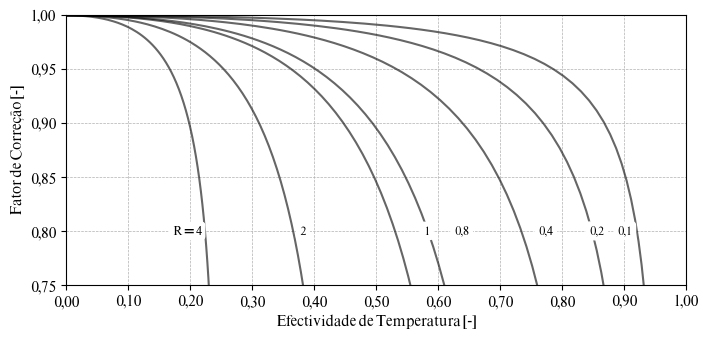

In [13]:
def format_func(value,tick_number):
    return f'{value:.2f}'.replace('.', ',')


font_path = './OPTITimes-Roman.otf'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()


dic = data_1A(1,1,[4,2,1,0.8,0.4,0.2,0.1])
y_position = 0.8  
fig, ax =  plt.subplots(figsize=(16/2,7/2))
for i,R in enumerate(dic):
    ax.plot(dic[R]['P'],dic[R]['F'],color = 'black', alpha = 0.6,linestyle = '-')
    
    x_position = np.interp(y_position, dic[R]['F'], dic[R]['P'])-0.05
    if i==0:
        label_r = f'R = {R}'.replace('.',',')
    else :
        label_r = f'{R}'.replace('.',',') 
    ax.text(x_position, y_position, label_r, va='center', ha='center', fontsize=8,
            fontproperties=font_prop, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))
ax.yaxis.set_major_locator(mtl(0.05))

ax.yaxis.set_minor_locator(mtl(0.05))

ax.xaxis.set_major_locator(mtl(0.1))

#ax.xaxis.set_minor_locator(mtl(0.1))
ax.xaxis.set_major_formatter(fontf(format_func))
ax.yaxis.set_major_formatter(fontf(format_func))

ax.grid(which='major', axis='both', linestyle='--', linewidth=0.5)
plt.axis([0,1,0.75,1])
ax.set_ylabel('Fator de Correção [-]',fontproperties=font_prop)
ax.set_xlabel('Efectividade de Temperatura [-]',fontproperties=font_prop)
ax.tick_params() 
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_prop)   
    label.set_fontsize(10)               
plt.show()




In [80]:
def state_fluid(P:float,T:float,fluid:str):
    fluid = fluid.capitalize()
    fluid_enum = getattr(FluidsList, fluid)    
    estado = Fluid(fluid_enum).with_state(Input.pressure(P), Input.temperature(T))
    return estado


